<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/overfit_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
import pandas as pd
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchsummary import summary

**Shuffle Lables Randomly**

In [4]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]),
                     target_transform=lambda y: torch.randint(0,10,(1,)).item())
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Take the batch size as 10


In [13]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [14]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,200)
        self.fc2=nn.Linear(200,100)
        self.fc3=nn.Linear(100,50)
        self.fc4=nn.Linear(50,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x,dim=1 )
        
net=Net()
print(net)

summary(net,(1,784))

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 200]         157,000
            Linear-2               [-1, 1, 100]          20,100
            Linear-3                [-1, 1, 50]           5,050
            Linear-4                [-1, 1, 10]             510
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.70
Estimated Total Size (MB): 0.70
----------------------------------------------------------------


In [15]:
train_loss = 0.0
valid_loss = 0.0
valid_loss_min=-1.0
train_loss_list=[]
valid_loss_list=[]
optimizer=optim.Adam(net.parameters(),lr=0.01)

for epoch in range(10):
    for images, labels in trainset:
        net.zero_grad()
        output = net(images.view(-1,28*28))
        loss = F.nll_loss(output,labels)
        train_loss_list.append(loss.item())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


    for images, labels in testset:
        output = net(images.view(-1,784))
        loss = F.poisson_nll_loss(output,labels)
        valid_loss_list.append(loss.item())
        valid_loss += loss.item()
    
    
train_loss = train_loss/len(trainset)
valid_loss = valid_loss/len(testset)

print('Epoch:  . Training Loss: {:.6f}. Validation_loss: {:.6f}'.format(train_loss,valid_loss))

if valid_loss <= valid_loss_min:
    print( 'Varidation Loss is decrease: ( {:.6f} -->{:.6f}). save the model...'.format(valid_loss_min, valid_loss))
    torch.save(model.state_dict(), 'mlp2_model.pt')
    valid_loss_min = valid_loss

Epoch:  . Training Loss: 23.050490. Validation_loss: 103.420483


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

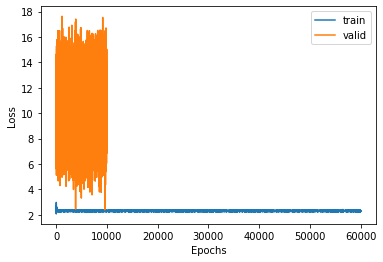

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list,label='train')
plt.plot(valid_loss_list,label='valid')
plt.legend('Valid','train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
